# Interpolacje


### Definicja
Dana jest funkcja y=f(x) określona i ciągła na danym przedziale [a,b], która przyjmuje wartosci $y_{1}$,$y_{2}$,....,$y_{n}$ dla skończonego zbioru argumentów $x_{1}$,$x_{2}$,...,$x_{n}$, czyli $y_{i}$=f($x_{i}$) dla i=1,...,n <br>
Zbiór argumentów {$x_{i}$} nazywamy *węzłami interpolacji*, przy czym zakłada się, że a $\leq$ $x_{1}$,$x_{2}$,...,$x_{n}$ $\leq$ b
<br> Sama interpolacja polega na znalezieniu innej 'przybliżonej' funkcji w danym przedziale, która w węzłach interpolacji przyjmuje te same wartości co oryginalna funkcja. Inaczej mówiąc, polega na wyznaczeniu przybliżonych wartości funkcji w punktach, które węzłami nie są, oraz na oszacowaniu błędu przybliżenia. Funkcję oryginalną nazywamy *funkcją interpolowaną*, a funkcję szukaną-*funkcją interpolującą*

Nie wchodząc w szczególy dotyczące kodu,dla zobrazowania definicji, poniższy przykład obrazuje dwa różne sposoby interpolacji:

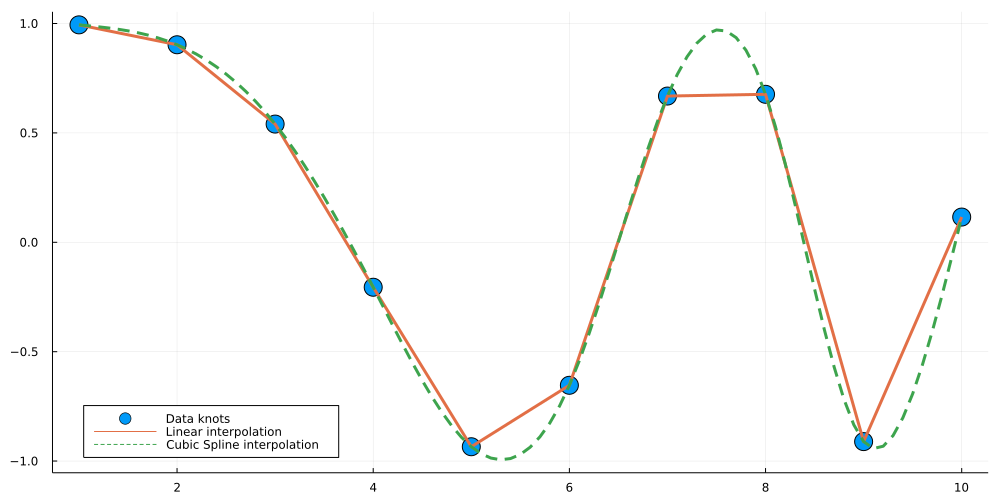

In [17]:
using Interpolations, Plots

# Lower and higher bound of interval
a = 1.0
b = 10.0
# Interval details
x = a:1.0:b
# This can be any sort of array data, as long as
# length(x) == length(y)
y = @. cos(x^2 / 9.0) # Function application by broadcasting
# Interpolations
itp_linear = LinearInterpolation(x, y)
itp_cubic = CubicSplineInterpolation(x, y)
# Interpolation functions
f_linear(x) = itp_linear(x)
f_cubic(x) = itp_cubic(x)
# Plots
width, height = 1000, 500 
x_new = a:0.1:b # smoother interval, necessary for cubic spline

scatter(x, y, markersize=10,label="Data knots")
plot!(f_linear, x_new, w=3,label="Linear interpolation")
plot!(f_cubic, x_new, linestyle=:dash, w=3, label="Cubic Spline interpolation")
plot!(size = (width, height))
plot!(legend = :bottomleft)

## Rodzaje interpolacji
Interpolacje można podzielić na wiele rodzajów. Najbardziej popularne to:<br><br>
Interpolacje liniowe:
  - wielomianowa
    - metoda Lagrange'a
    - wzór interpolacyjny Newtona(liniowa, kwadratowa, sześcienna)
    - wzór Neville'a
    - metoda Hermite'a
    - metoda Czebyszewa
  - trygonometryczna
  - funkcje sklejane

Interpolacje nieliniowe:
  - wymierna
  - wykładniczna


Warto wspomnieć, że Julia oferuje kilka bibliotek dotyczących interpolacji, przykładowo: BasicInterpolators, Interpolations, GridInterpolations, DataInterpolations. Zawierają większość z podstawowych metod interpolacji i będą przez nas wykorzystywane w dalszej części projektu, gdzie przyjrzymy się bliżej kilku wybranym metodom. 

### Interpolacja liniowa
Jedna z najprostszych metod interpolacyjnych przy użyciu wielomianu stopnia pierwszego czyli funkcji liniowej. Ponieważ funkcja liniowa jest jednoznacznie określona przez dwa punkty, więc interpolację należy przeprowadzić dla każdej pary kolejnych punktów z przedziału [a,b]. 
Stosując następujacy zapis:
f(x)=$b_{0}$+$b_{1}$(x-$x_{i}$) 
dla znanych punktów możemy zapisać<br>
f(x=$x_{i}$)=$b_{0}$+$b_{1}$($x_{i}$-$x_{i}$) <br>
f($x_{i}$)=$b_{0}$<br>
oraz<br>
f(x=$x_{i+1}$)=$b_{0}$+$b_{1}$($x_{i+1}$-$x_{i}$) <br>
f(x=$x_{i+1}$)=f($x_{i}$)+$b_{1}$($x_{i+1}$-$x_{i}$) <br>
Mamy więc:<br>
$b_{1}$=f(x=$x_{i+1}$)-f(x=$x_{i}$)/$x_{i+1}$-$x_{i}$<br>
Zatem wartość funkcji interpolującej można obliczyć ze wzoru:<br>
f(x)=f($x_{i}$)+(f(x=$x_{i+1}$)-f(x=$x_{i}$)/$x_{i+1}$-$x_{i}$)*(x-$x_{i}$)

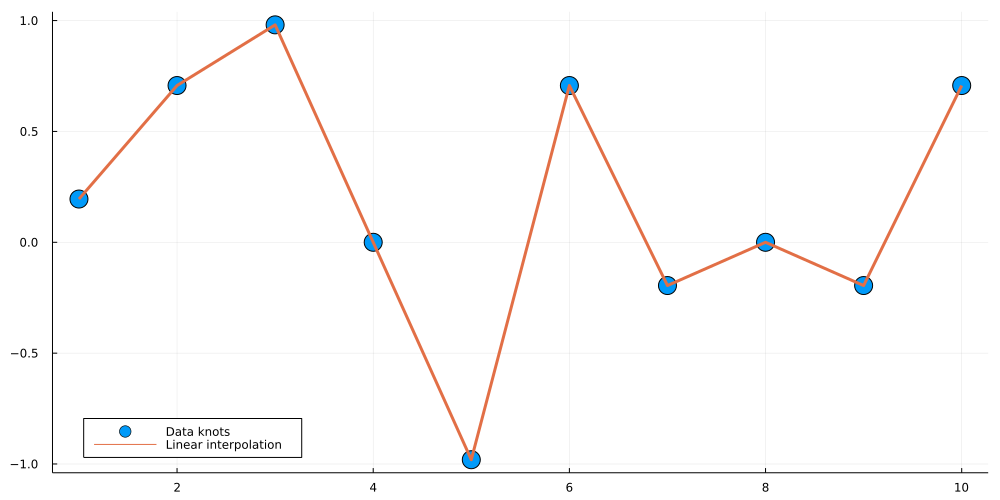

In [28]:
using Interpolations, Plots

a = 1.0
b = 10.0
x = a:1.0:b

y =@. sin(2pi*x^2/n) # Function application by broadcasting

itp_linear = LinearInterpolation(x, y)
f_linear(x) = itp_linear(x)
width, height = 1000, 500 

scatter(x, y, markersize=10,label="Data knots")
plot!(f_linear, x_new, w=3,label="Linear interpolation")
plot!(size = (width, height))
plot!(legend = :bottomleft)

### Interpolacja kwadratowa

### Metoda Lagrange'a

### Metoda Czebyszewa

### Interpolacja trygonometryczna